### Exploratory data analysis on the <a href="https://www.kaggle.com/marklvl/bike-sharing-dataset/home">"Bike Sharing in Washington D.C. Dataset"</a>

Perform EDA on the dataset with data visualization, using the Seaborn library.

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./day.csv', sep=",", quoting=3)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Visualize the distribution of numerical data using histograms.

The x-axis shows the numeric values, while the y-axis shows the absolute frequency.

The histogram shows that few of the riders are casual, most of them are registered members. The most common number of rides are 4000 to 6000. 

/home/maria/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/maria/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/maria/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/maria/.local/lib/python3.6/site-packages/pandas

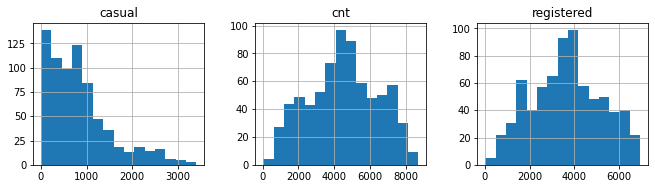

In [3]:
numerical = ['casual', 'registered', 'cnt']

df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

### Analyze categorical variables with regplots.

There is a linear relationship between the number of registered members and the number of rides.

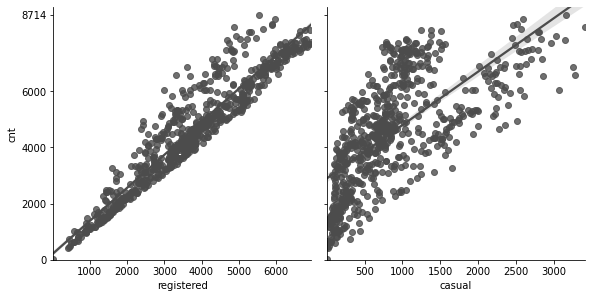

In [4]:
df_1 = pd.read_csv('./day.csv', sep=",", quoting=3)
g = sns.PairGrid(df_1, y_vars=["cnt"], x_vars=["registered", "casual"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(0, 9000), yticks=[0, 2000,4000,6000,8714]);

### Relationships between numeric and categorical variables

Analyze relationship between the cnt(count of rides) and the type of ridership(registered or casual) in the hue of weekday.

We can say that the registered members ride more in daily basis, while the casual members ride more during the weekends.

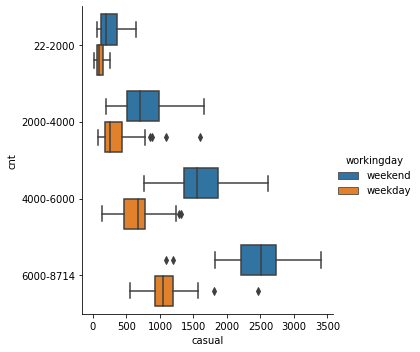

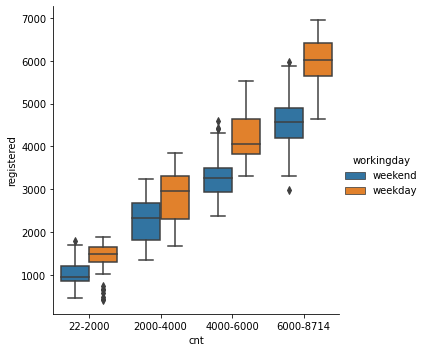

In [7]:
df_2 = pd.read_csv('./day.csv', sep=",", quoting=3)
df_2['workingday'] = df_2['workingday'].replace({0: 'weekend', 1: 'weekday'})
bins = [22,2000,4000,6000,8714]
df_2['cnt']=pd.cut(df_2['cnt'], bins=bins, labels=['22-2000', '2000-4000', '4000-6000', '6000-8714'])
sns.catplot(y="cnt", x="casual", hue="workingday", kind="box", data=df_2);
sns.catplot(x="cnt", y="registered", hue="workingday", kind="box", data=df_2);

Analyze relationship between cnt(count of rides) and the temperature during the week.

There is a trend to ride more while the temperature rises, independntly from day.

/home/maria/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


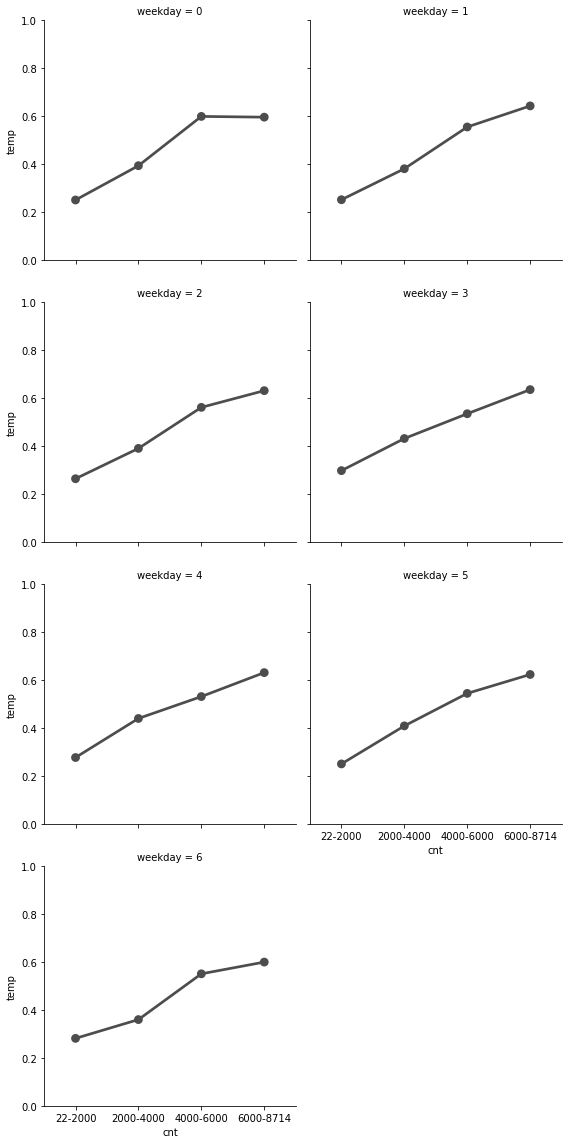

In [34]:
df_3 = pd.read_csv('./day.csv', sep=",", quoting=3)
bins = [22,2000,4000,6000,8714]
df_3['cnt']=pd.cut(df_3['cnt'], bins=bins, labels=['22-2000', '2000-4000', '4000-6000', '6000-8714'])
g = sns.FacetGrid(df_3, col="weekday", col_wrap=2, height=4, ylim=(0, 1))
g.map(sns.pointplot, "cnt", "temp", color=".3", ci=None);